In [1]:
# Imports for Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
import qiskit.circuit.library as qulib
from qiskit_aer import AerSimulator

# Various imports
import numpy as np

##IBMQ.save_account('Put your token')
##provider = IBMQ.load_account()
##IBMQ.get_provider(hub='ibm-q', group='open', project = 'main')

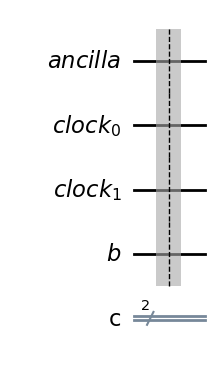

In [2]:
# Create the various registers needed
clock = QuantumRegister(2, name='clock')
input_reg = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
measurement = ClassicalRegister(2, name='c')

# Create an empty circuit with the specified registers
circuit = QuantumCircuit(ancilla, clock, input_reg, measurement)

circuit.barrier()
circuit.draw(output='mpl')

In [3]:
def qft_dagger(circ, q, n):      
    circ.h(clock[1]);
    for j in reversed(range(n)):
      for k in reversed(range(j+1,n)):
        circ.cp(-np.pi/float(2**(k-j)), q[k], q[j]);
        #circ.cu(0,0,0,-np.pi/float(2**(k-j)), q[k], q[j]);
    circ.h(clock[0]);
    circ.swap(clock[0], clock[1]);

def qft(circ, q, n):
    circ.swap(clock[0], clock[1]);
    circ.h(clock[0]);
    for j in reversed(range(n)):
      for k in reversed(range(j+1,n)):
        circ.cp(np.pi/float(2**(k-j)), q[k], q[j]);
        #circ.cu(0,0,0,np.pi/float(2**(k-j)), q[k], q[j]);
    circ.h(clock[1]);

In [4]:
def qpe(circ, clock, target):
    circuit.barrier()
    #U=e^{i*A*t} <--
    circuit.cu(np.pi / 2, -np.pi / 2, np.pi / 2, 3 * np.pi / 4, clock[0], input_reg, label='U');
    
    # U^2=e^{i*A*t*2} <--
    circuit.cu(np.pi, np.pi, 0, 0, clock[1], input_reg, label='U2');

    circuit.barrier();
    
    # Perform an inverse QFT on the register holding the eigenvalues
    qft_dagger(circuit, clock, 2)
    
def inv_qpe(circ, clock, target):
    
    # Perform a QFT on the register holding the eigenvalues
    qft(circuit, clock, 2)

    circuit.barrier()

    # U^-2=e^{i*A*t*2} <--
    circuit.cu(np.pi, np.pi, 0, 0, clock[1], input_reg, label='U2');

    #circuit.barrier();

    # U^-1=e^{i*A*t} <--
    circuit.cu(np.pi / 2, np.pi / 2, -np.pi / 2, -3 * np.pi / 4, clock[0], input_reg, label='U');

    circuit.barrier()

In [5]:
def hhl(circ, ancilla, clock, input, measurement):
    
    qpe(circ, clock, input)

    circuit.barrier()
    
    # This section is to test and implement  <--
    #circuit.cry(np.pi, clock[0], ancilla)
    #circuit.cry(np.pi/3, clock[1], ancilla)
    ccRy1=qulib.RYGate(np.pi).control(2, ctrl_state='01')
    circuit.append(ccRy1,[clock[0],clock[1],ancilla])
    ccRy2=qulib.RYGate(np.pi/3).control(2, ctrl_state='10')
    circuit.append(ccRy2,[clock[0],clock[1],ancilla])
    circuit.barrier()
    
    circuit.measure(ancilla, measurement[0])
    circuit.barrier()
    inv_qpe(circ, clock, input)

In [6]:
# State preparation. 
intial_state = [0,1]
circuit.initialize(intial_state, 3)

circuit.barrier()

# Perform a Hadamard Transform
circuit.h(clock)

hhl(circuit, ancilla, clock, input_reg, measurement)

# Perform a Hadamard Transform
circuit.h(clock)

circuit.barrier()


#circuit.measure(input, measurement[1])

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "ancilla"), index=0>, <Qubit register=(2, "clock"), index=0>, <Qubit register=(2, "clock"), index=1>, <Qubit register=(1, "b"), index=0>), clbits=())

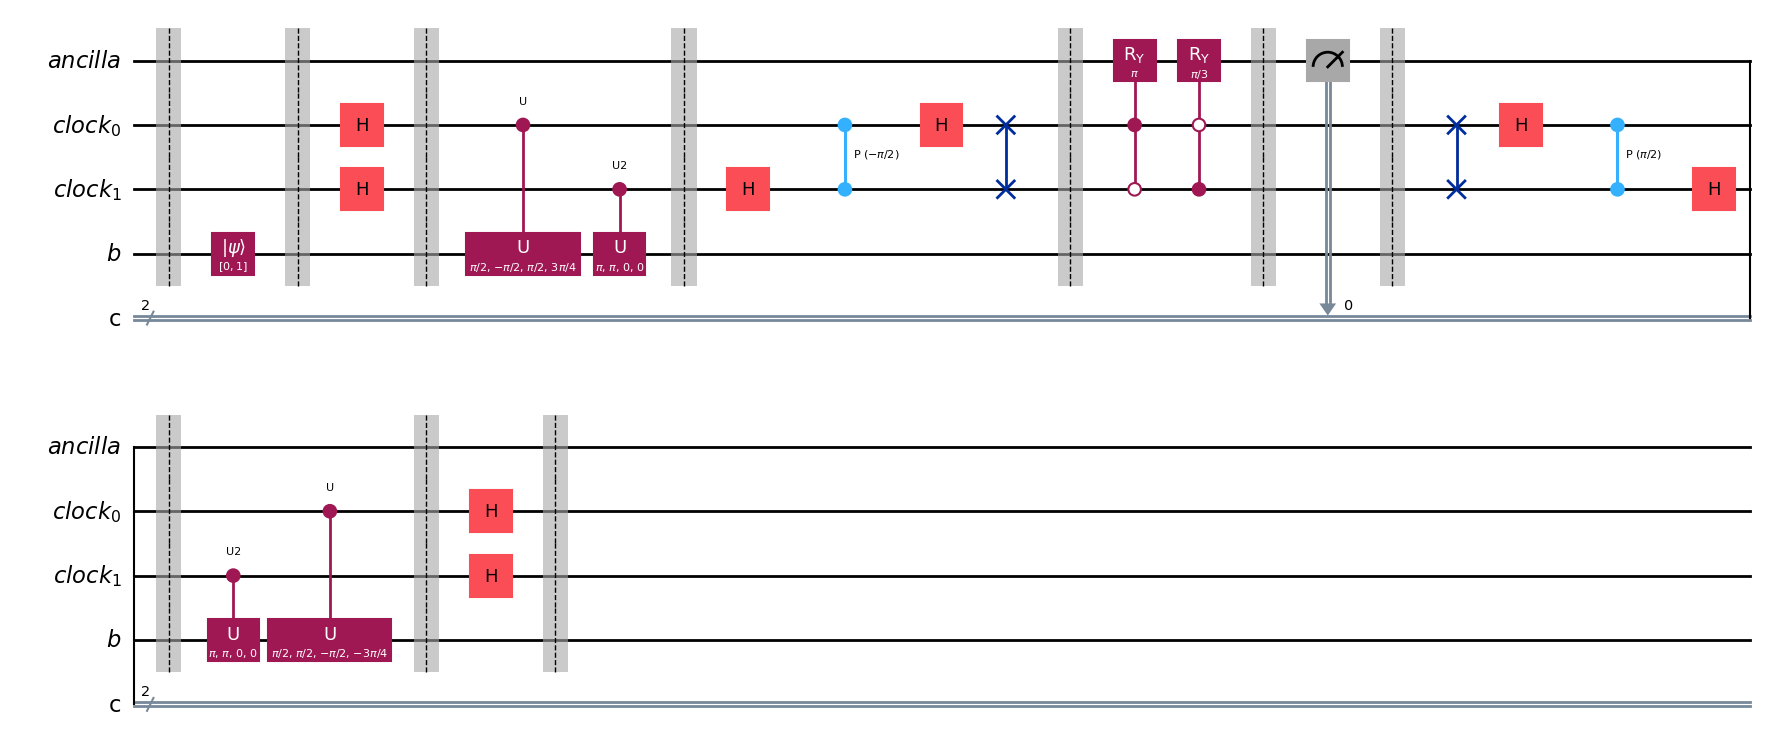

In [7]:
circuit.draw('mpl',scale=1)

In [8]:
simulator = AerSimulator()

transpiled_circuit = transpile(circuit, simulator)

shots = 10000
job = simulator.run(transpiled_circuit, shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)

{'00': 3738, '01': 6262}


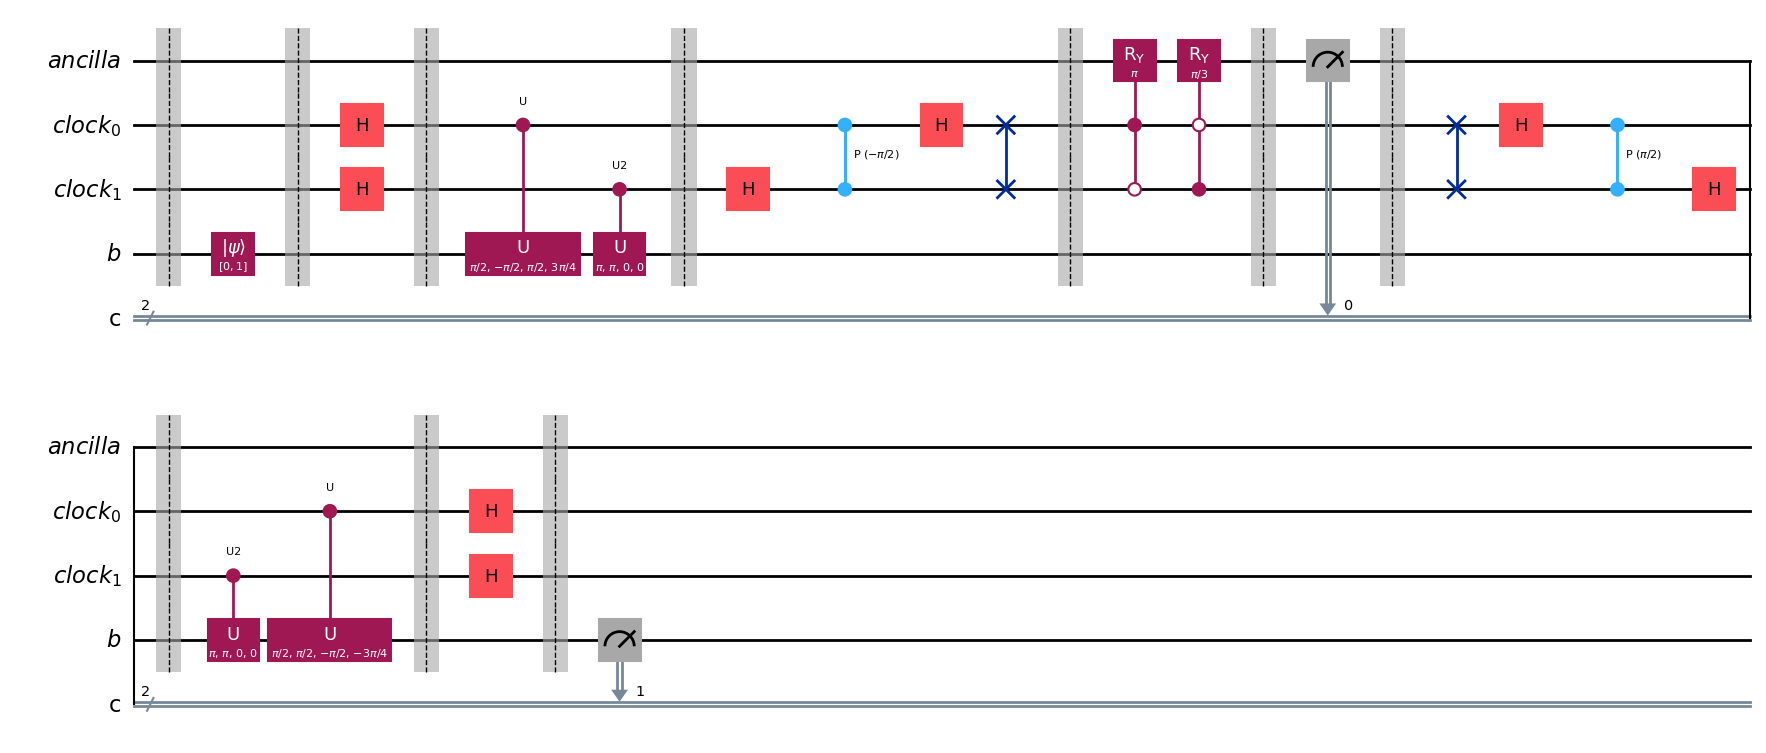

In [9]:
circuit.measure(input_reg, measurement[1])
circuit.draw('mpl',scale=1)

In [10]:
print(counts)

{'00': 3738, '01': 6262}


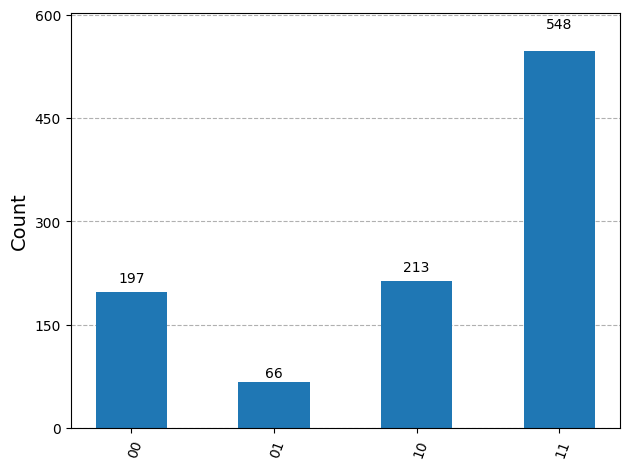

In [11]:
probe=1024
#65536
# Execute the circuit using the simulator
simulator = AerSimulator()

transpiled_circuit = transpile(circuit, simulator)
job = simulator.run(transpiled_circuit, shots=probe)

#Get the result of the execution
result = job.result()

# Get the counts, the frequency of each answer
counts = result.get_counts()

# Display the results
plot_histogram(counts)

In [12]:
print(counts)

{'11': 548, '00': 197, '10': 213, '01': 66}


In [13]:
67/593

0.11298482293423272

In [14]:
1/9

0.1111111111111111

In [15]:
2*np.arcsin(1/3)

np.float64(0.6796738189082439)

In [16]:
np.rad2deg(0.6796738189082439)

np.float64(38.94244126898138)

In [17]:
38.94244126898138/180

0.21634689593878548

## Project 5 - 151936

In [26]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

In [19]:
A = np.array([[2, -1],
              [-1, 2]])
b = np.array([0, 1])

### Classical

In [82]:
A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
x_normalized = x / np.linalg.norm(x)

classicalRatio = x[1]/x[0]
probabilityAmplitudes = x_normalized[1]**2/x_normalized[0]**2

print("Matrix A:")
print(A)
print("\nVector b:")
print(b)
print("\nSolution x:")
print(x)
print(x_normalized)
print("Ratio x1/x0:", classicalRatio)
print("Probability amplitudes (normalized):", probabilityAmplitudes)

Matrix A:
[[ 2 -1]
 [-1  2]]

Vector b:
[0 1]

Solution x:
[0.33333333 0.66666667]
[0.4472136  0.89442719]
Ratio x1/x0: 2.0
Probability amplitudes (normalized): 4.0


### Quantum

In [48]:
def qpe(circ, clock, target):
    circuit.barrier()
    #U=e^{i*A*t} <--
    circuit.cu(np.pi, 0, -np.pi / 2, 0, clock[0], target, label='U');
    
    # U^2=e^{i*A*t*2} <--
    circuit.cu(0, 0, 0, np.pi, clock[1], target, label='U2');

    circuit.barrier();
    
    # Perform an inverse QFT on the register holding the eigenvalues
    qft_dagger(circuit, clock, 2)
    
def inv_qpe(circ, clock, target):
    
    # Perform a QFT on the register holding the eigenvalues
    qft(circuit, clock, 2)

    circuit.barrier()

    # U^-2=e^{i*A*t*2} <--
    circuit.cu(0, 0, 0, np.pi, clock[1], target, label='U2');

    #circuit.barrier();

    # U^-1=e^{i*A*t} <--
    circuit.cu(np.pi, 0, -np.pi, (3/2)*np.pi, clock[0], target, label='U');

    circuit.barrier()

def hhl(circ, ancilla, clock, input, measurement):
    
    qpe(circ, clock, input)

    circuit.barrier()
    
    # This section is to test and implement  <--
    #circuit.cry(np.pi, clock[0], ancilla)
    #circuit.cry(np.pi/3, clock[1], ancilla)
    ccRy1=qulib.RYGate(np.pi).control(2, ctrl_state='01')
    circuit.append(ccRy1,[clock[0],clock[1],ancilla])

    ccRy2=qulib.RYGate((11/50)*np.pi).control(2, ctrl_state='11')
    circuit.append(ccRy2,[clock[0],clock[1],ancilla])

    circuit.barrier()
    
    circuit.measure(ancilla, measurement[0])
    circuit.barrier()
    inv_qpe(circ, clock, input)

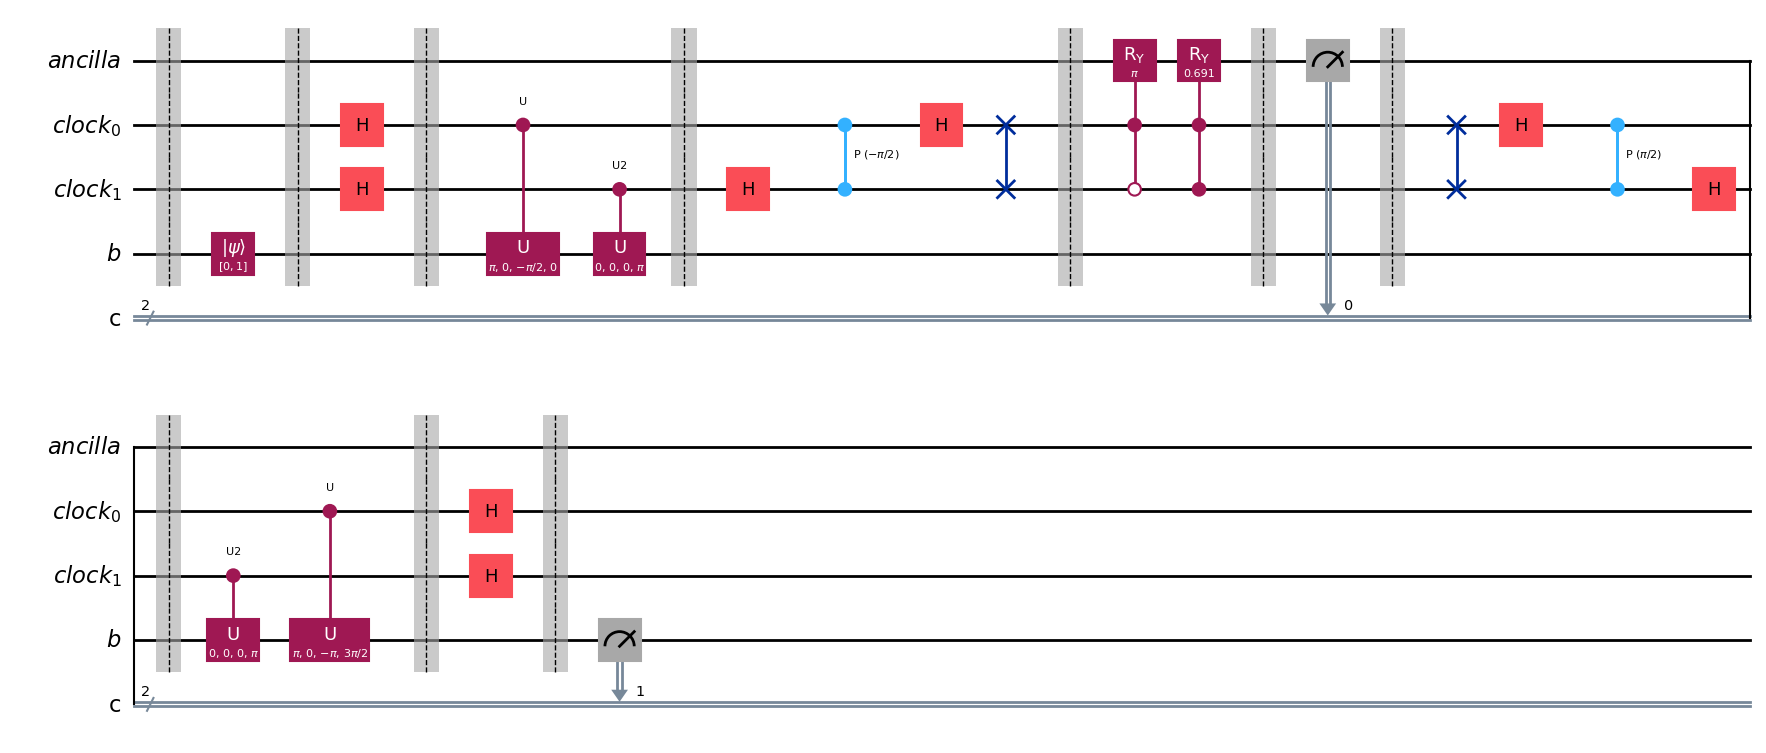

In [89]:
clock = QuantumRegister(2, name='clock')
input_reg = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
measurement = ClassicalRegister(2, name='c')

circuit = QuantumCircuit(ancilla, clock, input_reg, measurement)

circuit.barrier()

intial_state = [0,1]
circuit.initialize(intial_state, 3)

circuit.barrier()

circuit.h(clock)

hhl(circuit, ancilla, clock, input_reg, measurement)

circuit.h(clock)

circuit.barrier()


circuit.measure(input_reg, measurement[1])
circuit.draw('mpl',scale=1)

Counts: {'10': 1768, '11': 3679, '01': 918, '00': 1827}
Successes (Ancilla=1): {'11': 3679, '01': 918}
Quantum Ratio (from counts) x1/x0: 4.007625272331155
Classical Ratio x1/x0: 2.0
Classical Probability amplitudes (normalized): 4.0


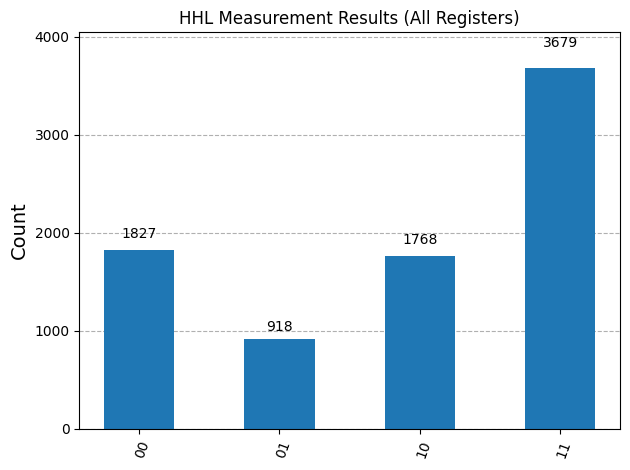

In [107]:
BACKEND = AerSimulator()
SHOTS = 8192

transCirc = transpile(circuit, BACKEND)
result = BACKEND.run(transCirc, shots=SHOTS).result()
counts = result.get_counts()
successes = {}
for state, count in counts.items():
    if state[-1] == '1':
        successes[state] = count


print("Counts:", counts)
print("Successes (Ancilla=1):", successes)

quantCountsRatio = successes.get('11', 0) / successes.get('01', 1)

print("Quantum Ratio (from counts) x1/x0:", quantCountsRatio)
print("Classical Ratio x1/x0:", classicalRatio)
print("Classical Probability amplitudes (normalized):", probabilityAmplitudes)


plot_histogram(counts, title="HHL Measurement Results (All Registers)")
